# Smart Building Project 

###### 20250710

Dataset: https://www.kaggle.com/datasets/claytonmiller/cubems-smart-building-energy-and-iaq-data

The data is recorded on 01 JAN 2019 to 31 DEC 2019 on the minute precision.

## Goals

1. Profile energy usage patterns (AC, lighting, plugs) over time.
   
2. Identify anomalies (e.g., spikes/drops in consumption).
   
3. Predict short-term energy demand (time-series forecasting).
   
4. Cluster zones based on usage behavior (e.g., which zones are most correlated?).

In [1]:
# Import Libraries
import pandas as pd      
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# For the purpose of this project, 2019Floor2.csv is selected for the analysis

In [3]:
# Import the Dataset
df0 = pd.read_csv('2019Floor2.csv')
df = df0.copy()

df

,Date,z1_AC1(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),z1_S1(RH%),z1_S1(lux),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),...,z3_Plug(kW),z3_S1(degC),z3_S1(RH%),z3_S1(lux),z4_AC1(kW),z4_Light(kW),z4_Plug(kW),z4_S1(degC),z4_S1(RH%),z4_S1(lux)
0,2019-01-01 00:00:00,0.0,0.31,0.09,NaN,NaN,NaN,0.00,1.15,0.85,...,0.23,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
1,2019-01-01 00:01:00,0.0,0.31,0.09,NaN,NaN,NaN,0.00,1.14,0.84,...,0.23,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
2,2019-01-01 00:02:00,0.0,0.31,0.09,NaN,NaN,NaN,0.00,1.14,0.83,...,0.23,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
3,2019-01-01 00:03:00,0.0,0.31,0.09,NaN,NaN,NaN,0.85,1.15,0.84,...,0.23,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
4,2019-01-01 00:04:00,0.0,0.31,0.09,NaN,NaN,NaN,0.94,1.17,0.87,...,0.23,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2019-12-31 23:55:00,0.0,0.01,0.18,27.65,61.50,0.0,1.12,0.00,0.00,...,0.24,28.34,58.94,0.0,0.0,0.0,0.0,27.81,55.30,0.0
525596,2019-12-31 23:56:00,0.0,0.01,0.18,27.66,61.45,0.0,1.13,0.00,0.00,...,0.24,28.34,58.36,0.0,0.0,0.0,0.0,27.81,55.60,0.0
525597,2019-12-31 23:57:00,0.0,0.01,0.18,27.65,61.49,0.0,1.16,0.00,0.00,...,0.24,28.37,57.74,0.0,0.0,0.0,0.0,27.80,55.10,0.0
525598,2019-12-31 23:58:00,0.0,0.01,0.18,27.66,61.50,0.0,1.17,0.00,0.00,...,0.24,28.35,57.83,0.0,0.0,0.0,0.0,27.82,55.80,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 37 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          525600 non-null  object 
 1   z1_AC1(kW)    495832 non-null  float64
 2   z1_Light(kW)  524967 non-null  float64
 3   z1_Plug(kW)   524964 non-null  float64
 4   z1_S1(degC)   413992 non-null  float64
 5   z1_S1(RH%)    413992 non-null  float64
 6   z1_S1(lux)    413992 non-null  float64
 7   z2_AC1(kW)    495710 non-null  float64
 8   z2_AC2(kW)    523441 non-null  float64
 9   z2_AC3(kW)    523441 non-null  float64
 10  z2_AC4(kW)    523441 non-null  float64
 11  z2_AC5(kW)    524949 non-null  float64
 12  z2_AC6(kW)    524949 non-null  float64
 13  z2_AC7(kW)    524949 non-null  float64
 14  z2_AC8(kW)    524949 non-null  float64
 15  z2_AC9(kW)    524949 non-null  float64
 16  z2_AC10(kW)   524949 non-null  float64
 17  z2_AC11(kW)   524949 non-null  float64
 18  z2_A

In [5]:
# The shape of the data
df.shape

# 525600 rows, 37 columns

(525600, 37)

## Data Cleaning

In [6]:
# Check for duplicates
df.duplicated().value_counts()

# No duplicated values found

False    525600
Name: count, dtype: int64

In [7]:
# Check for missing values
df.isnull().sum()

# Lots of values found to be missing

Date                 0
z1_AC1(kW)       29768
z1_Light(kW)       633
z1_Plug(kW)        636
z1_S1(degC)     111608
z1_S1(RH%)      111608
z1_S1(lux)      111608
z2_AC1(kW)       29890
z2_AC2(kW)        2159
z2_AC3(kW)        2159
z2_AC4(kW)        2159
z2_AC5(kW)         651
z2_AC6(kW)         651
z2_AC7(kW)         651
z2_AC8(kW)         651
z2_AC9(kW)         651
z2_AC10(kW)        651
z2_AC11(kW)        651
z2_AC12(kW)        651
z2_AC13(kW)        651
z2_AC14(kW)        651
z2_Light(kW)       736
z2_Plug(kW)        783
z2_S1(degC)      97021
z2_S1(RH%)       97018
z2_S1(lux)       97020
z3_Light(kW)       634
z3_Plug(kW)        633
z3_S1(degC)     102411
z3_S1(RH%)      102410
z3_S1(lux)      102414
z4_AC1(kW)       29772
z4_Light(kW)      2159
z4_Plug(kW)        783
z4_S1(degC)     103285
z4_S1(RH%)      103283
z4_S1(lux)      103288
dtype: int64

In [8]:
# The values can be missing for various reasons. (e.g. Sensor Failures, Temporary Power Usage, Data Processing Bugs, etc.)
# So checking on time interval of usage would make sense

# Since the Date column is necessary for indexing, that column is first to be dealt with

In [9]:
df.Date

0         2019-01-01 00:00:00
1         2019-01-01 00:01:00
2         2019-01-01 00:02:00
3         2019-01-01 00:03:00
4         2019-01-01 00:04:00
                 ...         
525595    2019-12-31 23:55:00
525596    2019-12-31 23:56:00
525597    2019-12-31 23:57:00
525598    2019-12-31 23:58:00
525599    2019-12-31 23:59:00
Name: Date, Length: 525600, dtype: object

In [10]:
# Convert Date to Datetime
df['Date'] = pd.to_datetime(df['Date'])

df['Date']

0        2019-01-01 00:00:00
1        2019-01-01 00:01:00
2        2019-01-01 00:02:00
3        2019-01-01 00:03:00
4        2019-01-01 00:04:00
                 ...        
525595   2019-12-31 23:55:00
525596   2019-12-31 23:56:00
525597   2019-12-31 23:57:00
525598   2019-12-31 23:58:00
525599   2019-12-31 23:59:00
Name: Date, Length: 525600, dtype: datetime64[ns]

In [11]:
# Set Column as Index
df.set_index('Date', inplace=True)

In [12]:
# Check Dataset Index
df.index

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 00:01:00',
               '2019-01-01 00:02:00', '2019-01-01 00:03:00',
               '2019-01-01 00:04:00', '2019-01-01 00:05:00',
               '2019-01-01 00:06:00', '2019-01-01 00:07:00',
               '2019-01-01 00:08:00', '2019-01-01 00:09:00',
               ...
               '2019-12-31 23:50:00', '2019-12-31 23:51:00',
               '2019-12-31 23:52:00', '2019-12-31 23:53:00',
               '2019-12-31 23:54:00', '2019-12-31 23:55:00',
               '2019-12-31 23:56:00', '2019-12-31 23:57:00',
               '2019-12-31 23:58:00', '2019-12-31 23:59:00'],
              dtype='datetime64[ns]', name='Date', length=525600, freq=None)

In [13]:
# Check for monotonic increment of index to ensure no out-of-order timestamps
df.index.is_monotonic_increasing

True

In [14]:
# Now the Date is set to index
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525600 entries, 2019-01-01 00:00:00 to 2019-12-31 23:59:00
Data columns (total 36 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   z1_AC1(kW)    495832 non-null  float64
 1   z1_Light(kW)  524967 non-null  float64
 2   z1_Plug(kW)   524964 non-null  float64
 3   z1_S1(degC)   413992 non-null  float64
 4   z1_S1(RH%)    413992 non-null  float64
 5   z1_S1(lux)    413992 non-null  float64
 6   z2_AC1(kW)    495710 non-null  float64
 7   z2_AC2(kW)    523441 non-null  float64
 8   z2_AC3(kW)    523441 non-null  float64
 9   z2_AC4(kW)    523441 non-null  float64
 10  z2_AC5(kW)    524949 non-null  float64
 11  z2_AC6(kW)    524949 non-null  float64
 12  z2_AC7(kW)    524949 non-null  float64
 13  z2_AC8(kW)    524949 non-null  float64
 14  z2_AC9(kW)    524949 non-null  float64
 15  z2_AC10(kW)   524949 non-null  float64
 16  z2_AC11(kW)   524949 non-null  float64
 17  z2_AC12(kW)   

In [15]:
# Extract date and time for further analysis
df['month'] = df.index.month
df['day'] = df.index.day
df['hour'] = df.index.hour
df['minute'] = df.index.minute

In [16]:
df

,z1_AC1(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),z1_S1(RH%),z1_S1(lux),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),z2_AC4(kW),...,z4_AC1(kW),z4_Light(kW),z4_Plug(kW),z4_S1(degC),z4_S1(RH%),z4_S1(lux),month,day,hour,minute
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,0.0,0.31,0.09,NaN,NaN,NaN,0.00,1.15,0.85,0.91,...,0.0,0.0,0.0,NaN,NaN,NaN,1,1,0,0
2019-01-01 00:01:00,0.0,0.31,0.09,NaN,NaN,NaN,0.00,1.14,0.84,0.90,...,0.0,0.0,0.0,NaN,NaN,NaN,1,1,0,1
2019-01-01 00:02:00,0.0,0.31,0.09,NaN,NaN,NaN,0.00,1.14,0.83,0.90,...,0.0,0.0,0.0,NaN,NaN,NaN,1,1,0,2
2019-01-01 00:03:00,0.0,0.31,0.09,NaN,NaN,NaN,0.85,1.15,0.84,0.91,...,0.0,0.0,0.0,NaN,NaN,NaN,1,1,0,3
2019-01-01 00:04:00,0.0,0.31,0.09,NaN,NaN,NaN,0.94,1.17,0.87,0.93,...,0.0,0.0,0.0,NaN,NaN,NaN,1,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 23:55:00,0.0,0.01,0.18,27.65,61.50,0.0,1.12,0.00,0.00,0.00,...,0.0,0.0,0.0,27.81,55.30,0.0,12,31,23,55
2019-12-31 23:56:00,0.0,0.01,0.18,27.66,61.45,0.0,1.13,0.00,0.00,0.00,...,0.0,0.0,0.0,27.81,55.60,0.0,12,31,23,56
2019-12-31 23:57:00,0.0,0.01,0.18,27.65,61.49,0.0,1.16,0.00,0.00,0.00,...,0.0,0.0,0.0,27.80,55.10,0.0,12,31,23,57


In [17]:
# Check for missing values
df.isnull().sum()

z1_AC1(kW)       29768
z1_Light(kW)       633
z1_Plug(kW)        636
z1_S1(degC)     111608
z1_S1(RH%)      111608
z1_S1(lux)      111608
z2_AC1(kW)       29890
z2_AC2(kW)        2159
z2_AC3(kW)        2159
z2_AC4(kW)        2159
z2_AC5(kW)         651
z2_AC6(kW)         651
z2_AC7(kW)         651
z2_AC8(kW)         651
z2_AC9(kW)         651
z2_AC10(kW)        651
z2_AC11(kW)        651
z2_AC12(kW)        651
z2_AC13(kW)        651
z2_AC14(kW)        651
z2_Light(kW)       736
z2_Plug(kW)        783
z2_S1(degC)      97021
z2_S1(RH%)       97018
z2_S1(lux)       97020
z3_Light(kW)       634
z3_Plug(kW)        633
z3_S1(degC)     102411
z3_S1(RH%)      102410
z3_S1(lux)      102414
z4_AC1(kW)       29772
z4_Light(kW)      2159
z4_Plug(kW)        783
z4_S1(degC)     103285
z4_S1(RH%)      103283
z4_S1(lux)      103288
month                0
day                  0
hour                 0
minute               0
dtype: int64

In [18]:
df.shape

(525600, 40)

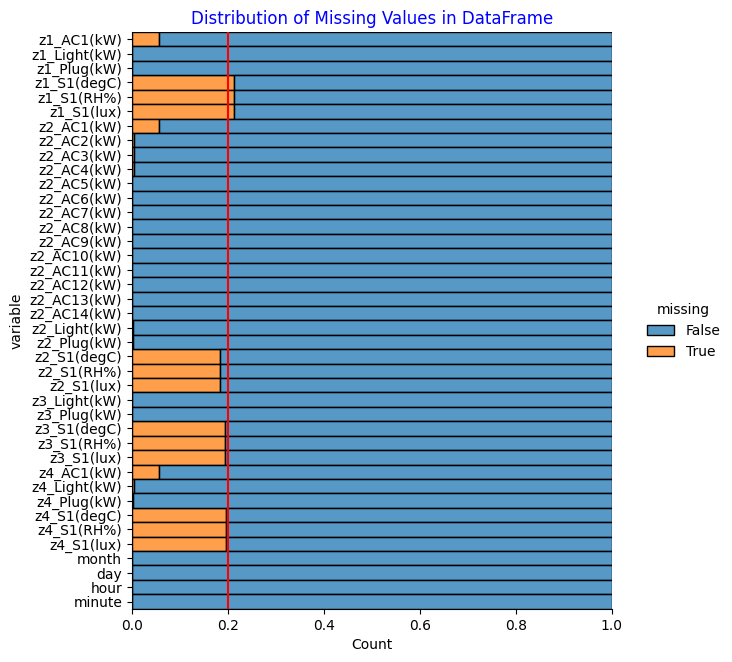

In [19]:
# Create a categorical plot to visualize missing values
sns.displot(data=df.isnull().melt(value_name="missing"),  # transforms the DataFrame into a long format.
            y="variable",
            hue="missing",
            multiple="fill",
            height=6.5)

# Add a vertical red line at x=0.2
plt.axvline(0.2, color="r")  

# Add title
plt.title("Distribution of Missing Values in DataFrame", color="b")

# Display the plot
plt.show()

In [20]:
# Calculate the percentage of missing values in each column

df.isnull().sum() / df.shape[0] * 100

z1_AC1(kW)       5.663623
z1_Light(kW)     0.120434
z1_Plug(kW)      0.121005
z1_S1(degC)     21.234399
z1_S1(RH%)      21.234399
z1_S1(lux)      21.234399
z2_AC1(kW)       5.686834
z2_AC2(kW)       0.410769
z2_AC3(kW)       0.410769
z2_AC4(kW)       0.410769
z2_AC5(kW)       0.123858
z2_AC6(kW)       0.123858
z2_AC7(kW)       0.123858
z2_AC8(kW)       0.123858
z2_AC9(kW)       0.123858
z2_AC10(kW)      0.123858
z2_AC11(kW)      0.123858
z2_AC12(kW)      0.123858
z2_AC13(kW)      0.123858
z2_AC14(kW)      0.123858
z2_Light(kW)     0.140030
z2_Plug(kW)      0.148973
z2_S1(degC)     18.459094
z2_S1(RH%)      18.458524
z2_S1(lux)      18.458904
z3_Light(kW)     0.120624
z3_Plug(kW)      0.120434
z3_S1(degC)     19.484589
z3_S1(RH%)      19.484399
z3_S1(lux)      19.485160
z4_AC1(kW)       5.664384
z4_Light(kW)     0.410769
z4_Plug(kW)      0.148973
z4_S1(degC)     19.650875
z4_S1(RH%)      19.650495
z4_S1(lux)      19.651446
month            0.000000
day              0.000000
hour        